# CNN

cnnとは？  
Convolutional Neural Networkは略してCNNと呼ばれています。  
CNNは一般的な順伝播型のニューラルネットワークとは違い、全結合層だけでなく畳み込み層(Convolution Layer)とプーリング層(Pooling Layer)から構成されるニューラルネットワークのことです。  

畳み込み層とプーリング層では入力のニューロンの一部の領域を絞って、局所的に次の層へと対応付けをしていきます。  
各層はフィルタと呼ばれる検出器をいくつも持っているイメージです。

画像認識の例でいうと、最初の層でエッジを検出して、次の層でテクスチャを検出し、さらに次のそうではより抽象的な猫の耳などの特徴を検出します。  
CNNはこういった特徴を抽出するための検出器であるフィルタのパラメータを自動で学習していきます。  
またCNNは畳み込みという概念により画像の位置情報を保持したまま学習が可能になり、画像認識や画像分析などの分野で使われています。

## 畳み込み層
畳み込み層はCNNのCと言われているConvolutionalの事です。　　
畳み込み層を詳しく説明すると、元の画像からフィルタにより特徴点を凝縮する処理で、次のような特徴があります。  

・畳み込み層は、元の画像にフィルタをかけて特徴マップを出力する（構成性）。 

・特徴マップのサイズは元の画像より少し小さくなる（元画像とフィルタのサイズによってサイズが変わる）。 

・画像全体をフィルタがスライドするので、特徴がどこにあっても抽出できる（移動不変性または位置不変性）。 

・フィルタは自動作成され、学習により変わってゆく（誤差逆伝搬）。 

・フィルタの数だけ特徴マップが出力される。  

わかりやすく説明すると、畳み込み層はフィルタとの一致率を計算し、類似している点(エッジ、特徴)の抽出を行なっています。

## プーリング層
この畳み込みニューラルネットワークにおいて、もうひとつ大きな存在感を発揮しているのが、「プーリング層」と呼ばれる層の存在です。  
畳み込みニューラルネットワークにおいて、「畳み込み層」が画像からのエッジ抽出等の特徴抽出の役割を果たしているとすると、「プーリング層」はそうした抽出された特徴が、平行移動などでも影響を受けないようにロバスト性を与える役割を果たします。  
畳み込みニューラルネットワークは、特に画像のカテゴリ分類（一般物体認識）で優れた性能を発揮するネットワークとして知られていますが、例えば写真に写った動物が犬か猫かをカテゴリ分類したい場合、犬と猫が正しく識別できることが重要であり、犬が左端に映っているか、右端に映っているかはあまり重要ではありません。  
つまり、そうした画像のカテゴリ分類というタスクにはあまり重要でない位置に関する情報を巧妙に削ぎ落としてやっているのが、この「プーリング層」と呼ばれる層の役割になります。

# TensorFlowでLeNetを実装

In [1]:
import sys, os
sys.path.append(os.pardir) 
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


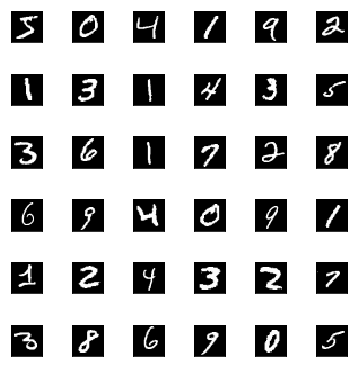

In [2]:
#MNISTを読み込み、trainとtestに分ける
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#matplotlibで一部を表示
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=0.8,  bottom=0, top=0.8, hspace=1, wspace=0.5)
for i in range(36):
    ax = fig.add_subplot(6, 6, i + 1, xticks=[], yticks=[])
    ax.imshow(x_train[i].reshape((28, 28)), cmap='gray')

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
import pickle

In [4]:
img_rows = x_train[0].shape[1] #画像サイズを取得しておく
img_cols = x_train[0].shape[0]
num_classes = len(set(y_train)) #正解ラベルをset型にすることで何種類に分類しているのかを確認

# 正解ラベルonehot
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = x_train.shape[1:4]

## LeNet論文を参照

畳み込み層　フィルタ数6、フィルタサイズ5×5、ストライド1  
サブサンプリング  
畳み込み層　フィルタ数16、フィルタサイズ5×5、ストライド1  
サブサンプリング  
平滑化  
全結合層　出力ノード数120  
全結合層　出力ノード数84  
全結合層　出力ノード数10  

In [5]:
model = Sequential()

model.add(Conv2D(6, kernel_size=(5, 5),
                 strides=(1, 1),
                 padding='same',
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2),
                      strides=(2,2),
                      padding='valid'))
model.add(Conv2D(16, kernel_size=(5, 5),
                 strides=(1, 1),
                 padding='same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),
                      strides=(2,2),
                      padding='valid'))


In [6]:

model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [7]:
model.fit(x_train[:5000], y_train[:5000],
          batch_size=100,
          epochs=7,
          verbose=1,
          validation_data=(x_test[:1000], y_test[:1000]))
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 5000 samples, validate on 1000 samples
Epoch 1/7
5000/5000 [==============================] - 12s 2ms/step - loss: 5.3133 - acc: 0.5288 - val_loss: 0.7457 - val_acc: 0.7850

しっかり学習できています。  
summaryも表示させてみましょう

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 16)        2416      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               94200     
_________________________________________________________________
dense_2 (Dense)              (None, 84)                10164     
__________

# tensorflowによるLeNet

In [11]:
import tensorflow as tf

In [12]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [13]:
train, target = mnist.train.next_batch(500)

In [14]:
train = train.reshape(500,28,28,1)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.2)

In [16]:
# 層の数
in1,in2,in3 = X_train.shape[1:4]
out_unit = 10

In [17]:
x = tf.placeholder(tf.float32,[None,in1,in2,in3],name = "x")
t = tf.placeholder(tf.float32,[None,out_unit],name = "t")

## 層の構築

In [18]:
conv_W1 = tf.Variable(tf.truncated_normal([5,5,1,6], mean=0.0, stddev=0.05),name = "W1")

conv1 = tf.nn.conv2d(X_train,conv_W1,strides=[1,1,1,1],padding="SAME",)

relu1 = tf.nn.relu(conv1)

pool1 = tf.nn.max_pool(relu1,ksize=[1,2,2,1],strides=[1,2,2,1],padding="VALID")

conv_W2 = tf.Variable(tf.truncated_normal([5,5,6,16], mean=0.0, stddev=0.05),name = "W3")

conv2= tf.nn.conv2d(pool1,conv_W2,strides=[1,1,1,1],padding="SAME",)

relu2 = tf.nn.relu(conv2)

f = tf.reshape(relu2,[-1,3136])

## 全結合層

In [19]:
# 中間層目
W1 = tf.Variable(tf.truncated_normal([3136,120], mean=0.0, stddev=0.05),name = "W1")
b1 =  tf.Variable(tf.zeros(120),name = "b1")

h1 = tf.nn.relu(tf.matmul(f,W1)+b1,name = "h1")

# 中間層目
W2 = tf.Variable(tf.truncated_normal([120,64], mean=0.0, stddev=0.05),name = "W2")
b2 =  tf.Variable(tf.zeros(64),name = "b2")

h2 = tf.nn.relu(tf.matmul(h1,W2)+b2,name = "h2")

## 出力層

In [20]:
W3 = tf.Variable(tf.truncated_normal([64,10],mean=0.0, stddev=0.05),name = "W3")
b3 = tf.Variable(tf.zeros([10]),name = "b3")
y = tf.nn.softmax(tf.matmul(h2,W3)+ b3,name = "y")

# 損失関数と正答率
テンソルボードで見やすくするために関数に名前をつけます。

In [21]:
#交差エントロピー　関数に名前付け
with tf.name_scope('cross_entropy'):
    cross_entropy = tf.reduce_mean(-tf.reduce_sum(t * tf.log(y), reduction_indices=[1]))

In [22]:
# バックプロパゲーション　関数に名前付け
with tf.name_scope('train'):
    train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [23]:
# 正答率　関数に名前付け
with tf.name_scope('accuracy'):
    correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(t,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [28]:
#セッションの作成
sess = tf.Session()
# 重みバイアスの初期化
sess.run(tf.global_variables_initializer())

## 学習

In [29]:
for epoch in range(30):
    sess.run(train_step, feed_dict={x:X_train,t:y_train})
    if epoch % 10 == 0:
        acc_val = sess.run(accuracy,feed_dict={x:X_train,t:y_train})
        print ('epoch: %d, Accuracy: %f'%(epoch, acc_val))

classified = correct_prediction.eval(session=sess, feed_dict={
    x:X_train,
    t:y_train})

prob = y.eval(session=sess,feed_dict={
    x:X_train,
    t:y_train})

epoch: 0, Accuracy: 0.112500
epoch: 10, Accuracy: 0.127500
epoch: 20, Accuracy: 0.477500


時間がかかるので少ししか回しませんでしたが、しっかり学習できました。

# AlexNetの実装

In [30]:
from keras.layers import BatchNormalization,Dropout
model = Sequential()

model.add(Conv2D(96, kernel_size=(11, 11),
                 strides=(4, 4),
                 padding='same',
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(3, 3),
                      strides=(2,2),
                      padding='same'))

model.add(BatchNormalization())

model.add(Conv2D(256, kernel_size=(5, 5),
                 strides=(1, 1),
                 padding='same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3),
                      strides=(2,2),
                      padding='same'))

model.add(Conv2D(384, kernel_size=(3, 3),
                 strides=(1, 1),
                 padding='same',
                 activation='relu'))

model.add(Conv2D(384, kernel_size=(3, 3),
                 strides=(1, 1),
                 padding='same',
                 activation='relu'))

model.add(Conv2D(384, kernel_size=(3, 3),
                 strides=(1, 1),
                 padding='same',
                 activation='relu'))

model.add(MaxPooling2D(pool_size=(3, 3),
                      strides=(2,21),
                      padding='same'))


model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(2048, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(2048, activation="relu"))

model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])



In [31]:
model.fit(x_train[:400], y_train[:400],
          batch_size=100,
          epochs=1,
          verbose=1,
          validation_data=(x_test[:100], y_test[:100]))
score = model.evaluate(x_test[:100], y_test[:100], verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 400 samples, validate on 100 samples
Epoch 1/1
100/100 [==============================] - 2s 15ms/step
Test loss: 14.5062857056
Test accuracy: 0.1


学習まではできましたが、重すぎて動かす気になれませんでした。  
sumarryを表示させてみます。


In [32]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 7, 7, 96)          11712     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 96)          0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 4, 4, 96)          384       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 4, 4, 256)         614656    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 2, 2, 256)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 2, 2, 384)         885120    
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 2, 2, 384)         1327488   
__________

# 畳み込み層

In [38]:
class convo():
    def __init__(self,x,f_node,f_size,stride):
        self.f = np.random.rand(f_node,f_size,f_size,1)
        self.n = x.shape[0]
        self.h = x.shape[1]
        self.w = x.shape[2]
        self.c = x.shape[3]
        self.s = stride
        self.f_size = f_size
        self.f_node = f_node
        self.x = x
        
    def foward(self):
        tmp = [[] for i in range(self.n)]
        tmp = np.array(tmp)
        # ワイドスタート　ワイドエンド
        ws = 0
        we = self.f_size
        hs = 0
        he = self.f_size        
        ite = self.w - self.f_size +1
        self.ite = ite
        i = 1
        
        for i1 in range(ite**2):
            for i2 in range(self.f.shape[0]):    
                con = (self.x[:,hs:he,ws:we] * self.f[i2]).sum(axis = 1).sum(axis=1)
                tmp = np.hstack((tmp,con))
                
            
            if we == self.w:
                ws = 0
                we = self.f_size
                hs += self.s
                he += self.s
            else:
                ws += self.s
                we += self.s
        
        self.out = tmp.reshape(self.n,ite,ite,self.f_node)
        return self.out
    
    def conv_back(self,dout):
        tmp = [[] for i in range(self.n)]
        tmp = np.array(tmp)
        
        dx = np.zeros(self.x.shape)
        df = np.zeros(self.f.shape)

        ws = 0
        we = self.f_size
        hs = 0
        he = self.f_size        
        i = 1

        dx = np.zeros(self.x.shape)
        df = np.zeros(self.f.shape)

        for i1 in range(dout.shape[1]**2):
            for i2 in range(self.f.shape[0]):
                dx[:,hs:he,ws:we] += (dout[:,hs:hs+1,ws:ws+1,:] * self.f[i2]).sum(axis = 3).reshape(
                    self.n,self.f_size,self.f_size,self.c)
                
                df[i2] += (self.x[:,hs:he,ws:we] * dout[:,hs:hs+1,ws:ws+1,i2].reshape(self.n,1,1,1)).sum(axis = 0)
                
            if we == self.w:
                ws = 0
                we = self.f_size
                hs += self.s
                he += self.s
            else:
                ws += self.s
                we += self.s
    
        
        return df,dx
    

# プーリング層

In [39]:
class pool():
    def __init__(self,x,p_node,p_size,stride):
        self.f = np.random.rand(p_node,p_size,p_size,1)
        self.n = x.shape[0]
        self.h = x.shape[1]
        self.w = x.shape[2]
        self.c = x.shape[3]
        self.s = stride
        self.p_size = p_size
        self.p_node = p_node
        self.x = x
        
    def foward(self):
        tmp = [[] for i in range(self.n)]
        tmp = np.array(tmp)
        # ワイドスタート　ワイドエンド
        ws = 0
        we = self.p_size
        hs = 0
        he = self.p_size        
        ite = self.w - self.p_size +1
        self.ite = ite
        i = 1
 
        for i1 in range(ite**2):
            for i2 in range(self.f.shape[0]):
                
                con = (self.x[:,hs:he,ws:we]).max(axis = 1).max(axis = 1)
                tmp = np.hstack((tmp,con))
            
            if we == self.w:
                ws = 0
                we = self.p_size
                hs += self.s
                he += self.s
            else:
                ws += self.s
                we += self.s
        
        self.out = tmp.reshape(self.n,ite,ite,self.p_node)
        
        return self.out
    
    def pool_back(self,dout):
        tmp = [[] for i in range(self.n)]
        tmp = np.array(tmp)
        
        dx = np.zeros(self.x.shape)
        df = np.zeros(self.f.shape)

        ws = 0
        we = self.p_size
        hs = 0
        he = self.p_size        
        i = 1

        dx = np.zeros(self.x.shape)

        for i1 in range(dout.shape[1]**2):
            for i2 in range(self.f.shape[0]):
                x_pool = (self.x[:,hs:he,ws:we])
                mask = (x_pool == x_pool.max(axis = 1).max(axis = 1))

                dx[:,hs:he,ws:we,i2] = (mask*dout[:,hs,ws,i2]).reshape(100,1,1)
                   
                    
            if we == dout.shape[1]:
                ws = 0
                we = self.p_size
                hs += self.s
                he += self.s
            else:
                ws += self.s
                we += self.s
    
        
        return df,dx

    

In [40]:
f_test = np.random.rand(1,5,5,1)

In [41]:
tester = convo(x_train[:100],3,5,1)

In [42]:
test2= tester.foward()

In [43]:
df2,dx2 = tester.conv_back(test2)

In [44]:
tester = pool(x_train[:100],3,5,1)

In [45]:
test3 = tester.foward()

畳み込み層、プーリング層共にしっかり出力を出す事ができました。

# im2col
上ではim2colを使わず実装を行いましたが、今回はim2colとim2colを使った畳み込み層とプーリング層を実装して行きます。

In [48]:
def im2col(input_data, filter_h, filter_w, stride=1, pad=0):
    """
    Parameters
    ----------
    input_data : (データ数, チャンネル, 高さ, 幅)の4次元配列からなる入力データ
    filter_h : フィルターの高さ
    filter_w : フィルターの幅
    stride : ストライド
    pad : パディング
    Returns
    -------
    col : 2次元配列
    """
    N, C, H, W = input_data.shape
    out_h = (H + 2*pad - filter_h)//stride + 1
    out_w = (W + 2*pad - filter_w)//stride + 1

    img = np.pad(input_data, [(0,0), (0,0), (pad, pad), (pad, pad)], 'constant')
    col = np.zeros((N, C, filter_h, filter_w, out_h, out_w))
    for y in range(filter_h):
        y_max = y + stride*out_h
        for x in range(filter_w):
            x_max = x + stride*out_w
            col[:, :, y, x, :, :] = img[:, :, y:y_max:stride, x:x_max:stride]

    col = col.transpose(0, 4, 5, 1, 2, 3).reshape(N*out_h*out_w, -1)
    return col


def col2im(col, input_shape, filter_h, filter_w, stride=1, pad=0):
    """
    Parameters
    ----------
    col :
    input_shape : 入力データの形状（例：(10, 1, 28, 28)）
    filter_h :
    filter_w
    stride
    pad
    Returns
    -------
    """
    N, C, H, W = input_shape
    out_h = (H + 2*pad - filter_h)//stride + 1
    out_w = (W + 2*pad - filter_w)//stride + 1
    col = col.reshape(N, out_h, out_w, C, filter_h, filter_w).transpose(0, 3, 4, 5, 1, 2)

    img = np.zeros((N, C, H + 2*pad + stride - 1, W + 2*pad + stride - 1))
    for y in range(filter_h):
        y_max = y + stride*out_h
        for x in range(filter_w):
            x_max = x + stride*out_w
            img[:, :, y:y_max:stride, x:x_max:stride] += col[:, :, y, x, :, :]

    return img[:, :, pad:H + pad, pad:W + pad]

def conv_output_size(input_size, filter_size, stride=1, pad=0):
    return (input_size + 2*pad - filter_size) / stride + 1


# 前回作ったDNNを使う

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import OrderedDict
%matplotlib inline

# 活性化関数の関数

In [50]:
def identity_function(x):
    return x


def step_function(x):
    return np.array(x > 0, dtype=np.int)


def sigmoid(x):
    return 1 / (1 + np.exp(-x))    


def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)
    

def relu(x):
    return np.maximum(0, x)


def relu_grad(x):
    grad = np.zeros(x)
    grad[x>=0] = 1
    return grad
    

def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # オーバーフロー対策
    return np.exp(x) / np.sum(np.exp(x))


In [51]:
def smooth_curve(x):
    window_len = 11
    s = np.r_[x[window_len-1:0:-1], x, x[-1:-window_len:-1]]
    w = np.kaiser(window_len, 2)
    y = np.convolve(w/w.sum(), s, mode='valid')
    return y[5:len(y)-5]

def shuffle_dataset(x, t):
    permutation = np.random.permutation(x.shape[0])
    x = x[permutation,:] if x.ndim == 2 else x[permutation,:,:,:]
    t = t[permutation]

    return x, t

# 損失関数

In [52]:
def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)


def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 教師データがone-hot-vectorの場合、正解ラベルのインデックスに変換
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size


def softmax_loss(X, t):
    y = softmax(X)
    return cross_entropy_error(y, t)

# Optimizer

In [53]:
class SGD:

    def __init__(self, lr=0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key] 


class Momentum:


    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():                                
                self.v[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.v[key] = self.momentum*self.v[key] - self.lr*grads[key] 
            params[key] += self.v[key]


class Nesterov:


    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
            
        for key in params.keys():
            self.v[key] *= self.momentum
            self.v[key] -= self.lr * grads[key]
            params[key] += self.momentum * self.momentum * self.v[key]
            params[key] -= (1 + self.momentum) * self.lr * grads[key]


class AdaGrad:

    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
            
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)


class RMSprop:


    def __init__(self, lr=0.01, decay_rate = 0.99):
        self.lr = lr
        self.decay_rate = decay_rate
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
            
        for key in params.keys():
            self.h[key] *= self.decay_rate
            self.h[key] += (1 - self.decay_rate) * grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)


class Adam:

    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None
        
    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)
        
        self.iter += 1
        lr_t  = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)         
        
        for key in params.keys():
            #self.m[key] = self.beta1*self.m[key] + (1-self.beta1)*grads[key]
            #self.v[key] = self.beta2*self.v[key] + (1-self.beta2)*(grads[key]**2)
            self.m[key] += (1 - self.beta1) * (grads[key] - self.m[key])
            self.v[key] += (1 - self.beta2) * (grads[key]**2 - self.v[key])
            
            params[key] -= lr_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)
            
            #unbias_m += (1 - self.beta1) * (grads[key] - self.m[key]) # correct bias
            #unbisa_b += (1 - self.beta2) * (grads[key]*grads[key] - self.v[key]) # correct bias
            #params[key] += self.lr * unbias_m / (np.sqrt(unbisa_b) + 1e-7)

# 活性化関数　クラス

In [54]:
class Relu:
    def __init__(self):
        self.mask = None

    def forward(self, x):
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0

        return out

    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout

        return dx


class Sigmoid:
    def __init__(self):
        self.out = None

    def forward(self, x):
        out = sigmoid(x)
        self.out = out
        return out

    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out

        return dx


class Affine:
    def __init__(self, W, b):
        self.W =W
        self.b = b
        
        self.x = None
        self.original_x_shape = None
        # 重み・バイアスパラメータの微分
        self.dW = None
        self.db = None

    def forward(self, x):
        # テンソル対応
        self.original_x_shape = x.shape
        x = x.reshape(x.shape[0], -1)
        self.x = x

        out = np.dot(self.x, self.W) + self.b

        return out

    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis=0)
        
        dx = dx.reshape(*self.original_x_shape)  # 入力データの形状に戻す（テンソル対応）
        return dx


class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None
        self.y = None # softmaxの出力
        self.t = None # 教師データ

    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)
        
        return self.loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        if self.t.size == self.y.size: # 教師データがone-hot-vectorの場合
            dx = (self.y - self.t) / batch_size
        else:
            dx = self.y.copy()
            dx[np.arange(batch_size), self.t] -= 1
            dx = dx / batch_size
        
        return dx


# ドロップアウト バッチノーマライズ

In [55]:
class Dropout:

    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None

    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)

    def backward(self, dout):
        return dout * self.mask


class BatchNormalization:

    def __init__(self, gamma, beta, momentum=0.9, running_mean=None, running_var=None):
        self.gamma = gamma
        self.beta = beta
        self.momentum = momentum
        self.input_shape = None # Conv層の場合は4次元、全結合層の場合は2次元  

        # テスト時に使用する平均と分散
        self.running_mean = running_mean
        self.running_var = running_var  
        
        # backward時に使用する中間データ
        self.batch_size = None
        self.xc = None
        self.std = None
        self.dgamma = None
        self.dbeta = None

    def forward(self, x, train_flg=True):
        self.input_shape = x.shape
        if x.ndim != 2:
            N, C, H, W = x.shape
            x = x.reshape(N, -1)

        out = self.__forward(x, train_flg)
        
        return out.reshape(*self.input_shape)
            
    def __forward(self, x, train_flg):
        if self.running_mean is None:
            N, D = x.shape
            self.running_mean = np.zeros(D)
            self.running_var = np.zeros(D)
                        
        if train_flg:
            mu = x.mean(axis=0)
            xc = x - mu
            var = np.mean(xc**2, axis=0)
            std = np.sqrt(var + 10e-7)
            xn = xc / std
            
            self.batch_size = x.shape[0]
            self.xc = xc
            self.xn = xn
            self.std = std
            self.running_mean = self.momentum * self.running_mean + (1-self.momentum) * mu
            self.running_var = self.momentum * self.running_var + (1-self.momentum) * var            
        else:
            xc = x - self.running_mean
            xn = xc / ((np.sqrt(self.running_var + 10e-7)))
            
        out = self.gamma * xn + self.beta 
        return out

    def backward(self, dout):
        if dout.ndim != 2:
            N, C, H, W = dout.shape
            dout = dout.reshape(N, -1)

        dx = self.__backward(dout)

        dx = dx.reshape(*self.input_shape)
        return dx

    def __backward(self, dout):
        dbeta = dout.sum(axis=0)
        dgamma = np.sum(self.xn * dout, axis=0)
        dxn = self.gamma * dout
        dxc = dxn / self.std
        dstd = -np.sum((dxn * self.xc) / (self.std * self.std), axis=0)
        dvar = 0.5 * dstd / self.std
        dxc += (2.0 / self.batch_size) * self.xc * dvar
        dmu = np.sum(dxc, axis=0)
        dx = dxc - dmu / self.batch_size
        
        self.dgamma = dgamma
        self.dbeta = dbeta
        
        return dx


In [56]:
class Convolution:
    def __init__(self, W, b, stride=1, pad=0):
        self.W = W
        self.b = b
        self.stride = stride
        self.pad = pad
        
        # 中間データ（backward時に使用）
        self.x = None   
        self.col = None
        self.col_W = None
        
        # 重み・バイアスパラメータの勾配
        self.dW = None
        self.db = None

    def forward(self, x):
        FN, C, FH, FW = self.W.shape
        N, C, H, W = x.shape
        out_h = 1 + int((H + 2*self.pad - FH) / self.stride)
        out_w = 1 + int((W + 2*self.pad - FW) / self.stride)

        col = im2col(x, FH, FW, self.stride, self.pad)
        col_W = self.W.reshape(FN, -1).T

        out = np.dot(col, col_W) + self.b
        out = out.reshape(N, out_h, out_w, -1).transpose(0, 3, 1, 2)

        self.x = x
        self.col = col
        self.col_W = col_W

        return out

    def backward(self, dout):
        FN, C, FH, FW = self.W.shape
        dout = dout.transpose(0,2,3,1).reshape(-1, FN)

        self.db = np.sum(dout, axis=0)
        self.dW = np.dot(self.col.T, dout)
        self.dW = self.dW.transpose(1, 0).reshape(FN, C, FH, FW)

        dcol = np.dot(dout, self.col_W.T)
        dx = col2im(dcol, self.x.shape, FH, FW, self.stride, self.pad)

        return dx


class Pooling:
    def __init__(self, pool_h, pool_w, stride=1, pad=0):
        self.pool_h = pool_h
        self.pool_w = pool_w
        self.stride = stride
        self.pad = pad
        
        self.x = None
        self.arg_max = None

    def forward(self, x):
        N, C, H, W = x.shape
        out_h = int(1 + (H - self.pool_h) / self.stride)
        out_w = int(1 + (W - self.pool_w) / self.stride)

        col = im2col(x, self.pool_h, self.pool_w, self.stride, self.pad)
        col = col.reshape(-1, self.pool_h*self.pool_w)

        arg_max = np.argmax(col, axis=1)
        out = np.max(col, axis=1)
        out = out.reshape(N, out_h, out_w, C).transpose(0, 3, 1, 2)

        self.x = x
        self.arg_max = arg_max

        return out

    def backward(self, dout):
        dout = dout.transpose(0, 2, 3, 1)
        
        pool_size = self.pool_h * self.pool_w
        dmax = np.zeros((dout.size, pool_size))
        dmax[np.arange(self.arg_max.size), self.arg_max.flatten()] = dout.flatten()
        dmax = dmax.reshape(dout.shape + (pool_size,)) 
        
        dcol = dmax.reshape(dmax.shape[0] * dmax.shape[1] * dmax.shape[2], -1)
        dx = col2im(dcol, self.x.shape, self.pool_h, self.pool_w, self.stride, self.pad)
        
        return dx

# DNN

In [57]:
class MultiLayerNetExtend:
    """拡張版の全結合による多層ニューラルネットワーク
    
    Weiht Decay、Dropout、Batch Normalizationの機能を持つ
    Parameters
    ----------
    input_size : 入力サイズ（MNISTの場合は784）
    hidden_size_list : 隠れ層のニューロンの数のリスト（e.g. [100, 100, 100]）
    output_size : 出力サイズ（MNISTの場合は10）
    activation : 'relu' or 'sigmoid'
    weight_init_std : 重みの標準偏差を指定（e.g. 0.01）
        'relu'または'he'を指定した場合は「Heの初期値」を設定
        'sigmoid'または'xavier'を指定した場合は「Xavierの初期値」を設定
    weight_decay_lambda : Weight Decay（L2ノルム）の強さ
    use_dropout: Dropoutを使用するかどうか
    dropout_ration : Dropoutの割り合い
    use_batchNorm: Batch Normalizationを使用するかどうか
    """
    def __init__(self, input_size, hidden_size_list, output_size,
                 activation='relu', weight_init_std='relu', weight_decay_lambda=0, 
                 use_dropout = False, dropout_ration = 0.5, use_batchnorm=False):
        self.input_size = input_size
        self.output_size = output_size
        self.hidden_size_list = hidden_size_list
        self.hidden_layer_num = len(hidden_size_list)
        self.use_dropout = use_dropout
        self.weight_decay_lambda = weight_decay_lambda
        self.use_batchnorm = use_batchnorm
        self.params = {}

        # 重みの初期化
        self.__init_weight(weight_init_std)

        # レイヤの生成
        activation_layer = {'sigmoid': Sigmoid, 'relu': Relu}
        self.layers = OrderedDict()
        for idx in range(1, self.hidden_layer_num+1):
            self.layers['Affine' + str(idx)] = Affine(self.params['W' + str(idx)],
                                                      self.params['b' + str(idx)])
            if self.use_batchnorm:
                self.params['gamma' + str(idx)] = np.ones(hidden_size_list[idx-1])
                self.params['beta' + str(idx)] = np.zeros(hidden_size_list[idx-1])
                self.layers['BatchNorm' + str(idx)] = BatchNormalization(self.params['gamma' + str(idx)], self.params['beta' + str(idx)])
                
            self.layers['Activation_function' + str(idx)] = activation_layer[activation]()
            
            if self.use_dropout:
                self.layers['Dropout' + str(idx)] = Dropout(dropout_ration)

        idx = self.hidden_layer_num + 1
        self.layers['Affine' + str(idx)] = Affine(self.params['W' + str(idx)], self.params['b' + str(idx)])

        self.last_layer = SoftmaxWithLoss()

    def __init_weight(self, weight_init_std):
        """重みの初期値設定
        Parameters
        ----------
        weight_init_std : 重みの標準偏差を指定（e.g. 0.01）
            'relu'または'he'を指定した場合は「Heの初期値」を設定
            'sigmoid'または'xavier'を指定した場合は「Xavierの初期値」を設定
        """
        all_size_list = [self.input_size] + self.hidden_size_list + [self.output_size]
        for idx in range(1, len(all_size_list)):
            scale = weight_init_std
            if str(weight_init_std).lower() in ('relu', 'he'):
                scale = np.sqrt(2.0 / all_size_list[idx - 1])  # ReLUを使う場合に推奨される初期値
            elif str(weight_init_std).lower() in ('sigmoid', 'xavier'):
                scale = np.sqrt(1.0 / all_size_list[idx - 1])  # sigmoidを使う場合に推奨される初期値
            self.params['W' + str(idx)] = scale * np.random.randn(all_size_list[idx-1], all_size_list[idx])
            self.params['b' + str(idx)] = np.zeros(all_size_list[idx])

    def predict(self, x, train_flg=False):
        for key, layer in self.layers.items():
            if "Dropout" in key or "BatchNorm" in key:
                x = layer.forward(x, train_flg)
            else:
                x = layer.forward(x)

        return x

    def loss(self, x, t, train_flg=False):
        """損失関数を求める
        引数のxは入力データ、tは教師ラベル
        """
        y = self.predict(x, train_flg)

        weight_decay = 0
        for idx in range(1, self.hidden_layer_num + 2):
            W = self.params['W' + str(idx)]
            weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)

        return self.last_layer.forward(y, t) + weight_decay

    def accuracy(self, X, T):
        Y = self.predict(X, train_flg=False)
        Y = np.argmax(Y, axis=1)
        if T.ndim != 1 : T = np.argmax(T, axis=1)

        accuracy = np.sum(Y == T) / float(X.shape[0])
        return accuracy

    def numerical_gradient(self, X, T):
        """勾配を求める（数値微分）
        Parameters
        ----------
        X : 入力データ
        T : 教師ラベル
        Returns
        -------
        各層の勾配を持ったディクショナリ変数
            grads['W1']、grads['W2']、...は各層の重み
            grads['b1']、grads['b2']、...は各層のバイアス
        """
        loss_W = lambda W: self.loss(X, T, train_flg=True)

        grads = {}
        for idx in range(1, self.hidden_layer_num+2):
            grads['W' + str(idx)] = numerical_gradient(loss_W, self.params['W' + str(idx)])
            grads['b' + str(idx)] = numerical_gradient(loss_W, self.params['b' + str(idx)])
            
            if self.use_batchnorm and idx != self.hidden_layer_num+1:
                grads['gamma' + str(idx)] = numerical_gradient(loss_W, self.params['gamma' + str(idx)])
                grads['beta' + str(idx)] = numerical_gradient(loss_W, self.params['beta' + str(idx)])

        return grads
        
    def gradient(self, x, t):
        # forward
        self.loss(x, t, train_flg=True)

        # backward
        dout = 1
        dout = self.last_layer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 設定
        grads = {}
        for idx in range(1, self.hidden_layer_num+2):
            grads['W' + str(idx)] = self.layers['Affine' + str(idx)].dW + self.weight_decay_lambda * self.params['W' + str(idx)]
            grads['b' + str(idx)] = self.layers['Affine' + str(idx)].db

            if self.use_batchnorm and idx != self.hidden_layer_num+1:
                grads['gamma' + str(idx)] = self.layers['BatchNorm' + str(idx)].dgamma
                grads['beta' + str(idx)] = self.layers['BatchNorm' + str(idx)].dbeta

        return grads

In [58]:
class Trainer:
    """ニューラルネットの訓練を行うクラス
    """
    def __init__(self, network, x_train, t_train, x_test, t_test,
                 epochs=20, mini_batch_size=100,
                 optimizer='SGD', optimizer_param={'lr':0.01}, 
                 evaluate_sample_num_per_epoch=None, verbose=True):
        self.network = network
        self.verbose = verbose
        self.x_train = x_train
        self.t_train = t_train
        self.x_test = x_test
        self.t_test = t_test
        self.epochs = epochs
        self.batch_size = mini_batch_size
        self.evaluate_sample_num_per_epoch = evaluate_sample_num_per_epoch

        # optimizer
        optimizer_class_dict = {'sgd':SGD, 'momentum':Momentum, 'nesterov':Nesterov,
                                'adagrad':AdaGrad, 'rmsprpo':RMSprop, 'adam':Adam}
        self.optimizer = optimizer_class_dict[optimizer.lower()](**optimizer_param)
        
        self.train_size = x_train.shape[0]
        self.iter_per_epoch = max(self.train_size / mini_batch_size, 1)
        self.max_iter = int(epochs * self.iter_per_epoch)
        self.current_iter = 0
        self.current_epoch = 0
        
        self.train_loss_list = []
        self.train_acc_list = []
        self.test_acc_list = []

    def train_step(self):
        batch_mask = np.random.choice(self.train_size, self.batch_size)
        x_batch = self.x_train[batch_mask]
        t_batch = self.t_train[batch_mask]
        
        grads = self.network.gradient(x_batch, t_batch)
        self.optimizer.update(self.network.params, grads)
        
        loss = self.network.loss(x_batch, t_batch)
        self.train_loss_list.append(loss)
        if self.verbose: print("train loss:" + str(loss))
        
        if self.current_iter % self.iter_per_epoch == 0:
            self.current_epoch += 1
            
            x_train_sample, t_train_sample = self.x_train, self.t_train
            x_test_sample, t_test_sample = self.x_test, self.t_test
            if not self.evaluate_sample_num_per_epoch is None:
                t = self.evaluate_sample_num_per_epoch
                x_train_sample, t_train_sample = self.x_train[:t], self.t_train[:t]
                x_test_sample, t_test_sample = self.x_test[:t], self.t_test[:t]
                
            train_acc = self.network.accuracy(x_train_sample, t_train_sample)
            test_acc = self.network.accuracy(x_test_sample, t_test_sample)
            self.train_acc_list.append(train_acc)
            self.test_acc_list.append(test_acc)

            if self.verbose: print("=== epoch:" + str(self.current_epoch) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc) + " ===")
        self.current_iter += 1

    def train(self):
        for i in range(self.max_iter):
            self.train_step()

        test_acc = self.network.accuracy(self.x_test, self.t_test)

        if self.verbose:
            print("=============== Final Test Accuracy ===============")
            print("test acc:" + str(test_acc))

# CNN層を作成するクラス

In [59]:


class DeepConvNet:
    """認識率99%以上の高精度なConvNet
    ネットワーク構成は下記の通り
        conv - relu - conv- relu - pool -
        conv - relu - conv- relu - pool -
        conv - relu - conv- relu - pool -
        affine - relu - dropout - affine - dropout - softmax
    """
    def __init__(self, input_dim=(1, 28, 28),
                 conv_param_1 = {'filter_num':16, 'filter_size':3, 'pad':1, 'stride':1},
                 conv_param_2 = {'filter_num':16, 'filter_size':3, 'pad':1, 'stride':1},
                 conv_param_3 = {'filter_num':32, 'filter_size':3, 'pad':1, 'stride':1},
                 conv_param_4 = {'filter_num':32, 'filter_size':3, 'pad':2, 'stride':1},
                 conv_param_5 = {'filter_num':64, 'filter_size':3, 'pad':1, 'stride':1},
                 conv_param_6 = {'filter_num':64, 'filter_size':3, 'pad':1, 'stride':1},
                 hidden_size=50, output_size=10):
        # 重みの初期化===========
        # 各層のニューロンひとつあたりが、前層のニューロンといくつのつながりがあるか（TODO:自動で計算する）
        pre_node_nums = np.array([1*3*3, 16*3*3, 16*3*3, 32*3*3, 32*3*3, 64*3*3, 64*4*4, hidden_size])
        wight_init_scales = np.sqrt(2.0 / pre_node_nums)  # ReLUを使う場合に推奨される初期値
        
        self.params = {}
        pre_channel_num = input_dim[0]
        for idx, conv_param in enumerate([conv_param_1, conv_param_2, conv_param_3, conv_param_4, conv_param_5, conv_param_6]):
            self.params['W' + str(idx+1)] = wight_init_scales[idx] * np.random.randn(conv_param['filter_num'], pre_channel_num, conv_param['filter_size'], conv_param['filter_size'])
            self.params['b' + str(idx+1)] = np.zeros(conv_param['filter_num'])
            pre_channel_num = conv_param['filter_num']
        self.params['W7'] = wight_init_scales[6] * np.random.randn(64*4*4, hidden_size)
        self.params['b7'] = np.zeros(hidden_size)
        self.params['W8'] = wight_init_scales[7] * np.random.randn(hidden_size, output_size)
        self.params['b8'] = np.zeros(output_size)

        # レイヤの生成===========
        self.layers = []
        self.layers.append(Convolution(self.params['W1'], self.params['b1'], 
                           conv_param_1['stride'], conv_param_1['pad']))
        self.layers.append(Relu())
        self.layers.append(Convolution(self.params['W2'], self.params['b2'], 
                           conv_param_2['stride'], conv_param_2['pad']))
        self.layers.append(Relu())
        self.layers.append(Pooling(pool_h=2, pool_w=2, stride=2))
        self.layers.append(Convolution(self.params['W3'], self.params['b3'], 
                           conv_param_3['stride'], conv_param_3['pad']))
        self.layers.append(Relu())
        self.layers.append(Convolution(self.params['W4'], self.params['b4'],
                           conv_param_4['stride'], conv_param_4['pad']))
        self.layers.append(Relu())
        self.layers.append(Pooling(pool_h=2, pool_w=2, stride=2))
        self.layers.append(Convolution(self.params['W5'], self.params['b5'],
                           conv_param_5['stride'], conv_param_5['pad']))
        self.layers.append(Relu())
        self.layers.append(Convolution(self.params['W6'], self.params['b6'],
                           conv_param_6['stride'], conv_param_6['pad']))
        self.layers.append(Relu())
        self.layers.append(Pooling(pool_h=2, pool_w=2, stride=2))
        self.layers.append(Affine(self.params['W7'], self.params['b7']))
        self.layers.append(Relu())
        self.layers.append(Dropout(0.5))
        self.layers.append(Affine(self.params['W8'], self.params['b8']))
        self.layers.append(Dropout(0.5))
        
        self.last_layer = SoftmaxWithLoss()

    def predict(self, x, train_flg=False):
        for layer in self.layers:
            if isinstance(layer, Dropout):
                x = layer.forward(x, train_flg)
            else:
                x = layer.forward(x)
        return x

    def loss(self, x, t):
        y = self.predict(x, train_flg=True)
        return self.last_layer.forward(y, t)

    def accuracy(self, x, t, batch_size=100):
        if t.ndim != 1 : t = np.argmax(t, axis=1)

        acc = 0.0

        for i in range(int(x.shape[0] / batch_size)):
            tx = x[i*batch_size:(i+1)*batch_size]
            tt = t[i*batch_size:(i+1)*batch_size]
            y = self.predict(tx, train_flg=False)
            y = np.argmax(y, axis=1)
            acc += np.sum(y == tt)

        return acc / x.shape[0]

    def gradient(self, x, t):
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.last_layer.backward(dout)

        tmp_layers = self.layers.copy()
        tmp_layers.reverse()
        for layer in tmp_layers:
            dout = layer.backward(dout)

        # 設定
        grads = {}
        for i, layer_idx in enumerate((0, 2, 5, 7, 10, 12, 15, 18)):
            grads['W' + str(i+1)] = self.layers[layer_idx].dW
            grads['b' + str(i+1)] = self.layers[layer_idx].db

        return grads

    def save_params(self, file_name="params.pkl"):
        params = {}
        for key, val in self.params.items():
            params[key] = val
        with open(file_name, 'wb') as f:
            pickle.dump(params, f)

    def load_params(self, file_name="params.pkl"):
        with open(file_name, 'rb') as f:
            params = pickle.load(f)
        for key, val in params.items():
            self.params[key] = val

        for i, layer_idx in enumerate((0, 2, 5, 7, 10, 12, 15, 18)):
            self.layers[layer_idx].W = self.params['W' + str(i+1)]
            self.layers[layer_idx].b = self.params['b' + str(i+1)]

In [60]:


class SimpleConvNet:
    """単純なConvNet
    conv - relu - pool - affine - relu - affine - softmax
    
    Parameters
    ----------
    input_size : 入力サイズ（MNISTの場合は784）
    hidden_size_list : 隠れ層のニューロンの数のリスト（e.g. [100, 100, 100]）
    output_size : 出力サイズ（MNISTの場合は10）
    activation : 'relu' or 'sigmoid'
    weight_init_std : 重みの標準偏差を指定（e.g. 0.01）
        'relu'または'he'を指定した場合は「Heの初期値」を設定
        'sigmoid'または'xavier'を指定した場合は「Xavierの初期値」を設定
    """
    def __init__(self, input_dim=(1, 28, 28), 
                 conv_param={'filter_num':30, 'filter_size':5, 'pad':0, 'stride':1},
                 hidden_size=100, output_size=10, weight_init_std=0.01):
        filter_num = conv_param['filter_num']
        filter_size = conv_param['filter_size']
        filter_pad = conv_param['pad']
        filter_stride = conv_param['stride']
        input_size = input_dim[1]
        conv_output_size = (input_size - filter_size + 2*filter_pad) / filter_stride + 1
        pool_output_size = int(filter_num * (conv_output_size/2) * (conv_output_size/2))

        # 重みの初期化
        self.params = {}
        self.params['W1'] = weight_init_std * \
                            np.random.randn(filter_num, input_dim[0], filter_size, filter_size)
        self.params['b1'] = np.zeros(filter_num)
        self.params['W2'] = weight_init_std * \
                            np.random.randn(pool_output_size, hidden_size)
        self.params['b2'] = np.zeros(hidden_size)
        self.params['W3'] = weight_init_std * \
                            np.random.randn(hidden_size, output_size)
        self.params['b3'] = np.zeros(output_size)

        # レイヤの生成
        self.layers = OrderedDict()
        self.layers['Conv1'] = Convolution(self.params['W1'], self.params['b1'],
                                           conv_param['stride'], conv_param['pad'])
        self.layers['Relu1'] = Relu()
        self.layers['Pool1'] = Pooling(pool_h=2, pool_w=2, stride=2)
        self.layers['Affine1'] = Affine(self.params['W2'], self.params['b2'])
        self.layers['Relu2'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W3'], self.params['b3'])

        self.last_layer = SoftmaxWithLoss()

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)

        return x

    def loss(self, x, t):
        """損失関数を求める
        引数のxは入力データ、tは教師ラベル
        """
        y = self.predict(x)
        return self.last_layer.forward(y, t)

    def accuracy(self, x, t, batch_size=100):
        if t.ndim != 1 : t = np.argmax(t, axis=1)
        
        acc = 0.0
        
        for i in range(int(x.shape[0] / batch_size)):
            tx = x[i*batch_size:(i+1)*batch_size]
            tt = t[i*batch_size:(i+1)*batch_size]
            y = self.predict(tx)
            y = np.argmax(y, axis=1)
            acc += np.sum(y == tt) 
        
        return acc / x.shape[0]

    def numerical_gradient(self, x, t):
        """勾配を求める（数値微分）
        Parameters
        ----------
        x : 入力データ
        t : 教師ラベル
        Returns
        -------
        各層の勾配を持ったディクショナリ変数
            grads['W1']、grads['W2']、...は各層の重み
            grads['b1']、grads['b2']、...は各層のバイアス
        """
        loss_w = lambda w: self.loss(x, t)

        grads = {}
        for idx in (1, 2, 3):
            grads['W' + str(idx)] = numerical_gradient(loss_w, self.params['W' + str(idx)])
            grads['b' + str(idx)] = numerical_gradient(loss_w, self.params['b' + str(idx)])

        return grads

    def gradient(self, x, t):
        """勾配を求める（誤差逆伝搬法）
        Parameters
        ----------
        x : 入力データ
        t : 教師ラベル
        Returns
        -------
        各層の勾配を持ったディクショナリ変数
            grads['W1']、grads['W2']、...は各層の重み
            grads['b1']、grads['b2']、...は各層のバイアス
        """
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.last_layer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 設定
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Conv1'].dW, self.layers['Conv1'].db
        grads['W2'], grads['b2'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W3'], grads['b3'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grads
        
    def save_params(self, file_name="params.pkl"):
        params = {}
        for key, val in self.params.items():
            params[key] = val
        with open(file_name, 'wb') as f:
            pickle.dump(params, f)

    def load_params(self, file_name="params.pkl"):
        with open(file_name, 'rb') as f:
            params = pickle.load(f)
        for key, val in params.items():
            self.params[key] = val

        for i, key in enumerate(['Conv1', 'Affine1', 'Affine2']):
            self.layers[key].W = self.params['W' + str(i+1)]
            self.layers[key].b = self.params['b' + str(i+1)]

# 学習

In [67]:
from keras.datasets import mnist

In [68]:
(x_train, t_train), (x_test, t_test) =  mnist.load_data()

In [69]:
x_train = x_train[:5000]
t_train = t_train[:5000]
x_test = x_test[:5000]
t_test = t_test[:5000]

In [70]:
img_rows = x_train[0].shape[1] #画像サイズを取得しておく
img_cols = x_train[0].shape[0]


# 正解ラベルonehot
t_train = np.identity(10)[t_train]
t_test = np.identity(10)[t_test]

In [71]:
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
x_train = x_train.transpose(0,3,1,2)
x_test = x_test.transpose(0,3,1,2)
input_shape = x_train.shape[1:4]

print(x_train.shape)

(5000, 1, 28, 28)


train loss:1.88372978957
=== epoch:1, train acc:0.22, test acc:0.254 ===
train loss:1.59901902004
train loss:1.42928789231
train loss:0.995954182124
train loss:0.718529150337
train loss:0.546060069896
train loss:0.577347526534
train loss:0.646141596043
train loss:0.496700856727
train loss:0.534216538741
train loss:0.641664023833
train loss:0.541184165343
train loss:0.386881443028
train loss:0.34500534328
train loss:0.454319258868
train loss:0.592048869749
train loss:0.333428487161
train loss:0.494727238117
train loss:0.400951162062
train loss:0.245820966906
train loss:0.266213646987
train loss:0.425459031563
train loss:0.316436715703
train loss:0.415423212872
train loss:0.36022951784
train loss:0.275891287367
train loss:0.320211446182
train loss:0.205535658832
train loss:0.258483291866
train loss:0.184584292511
train loss:0.212559032007
train loss:0.238768518957
train loss:0.134100314041
train loss:0.31921686499
train loss:0.335597465888
train loss:0.150994098137
train loss:0.252032635

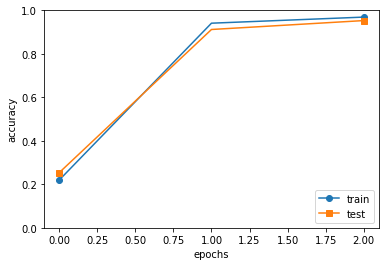

In [72]:
max_epochs = 3

network = SimpleConvNet(input_dim=(1,28,28,1), 
                        conv_param = {'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)
                        
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=max_epochs, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr': 0.001},
                  evaluate_sample_num_per_epoch=1000)
trainer.train()

# パラメータの保存
network.save_params("params.pkl")
print("Saved Network Parameters!")

# グラフの描画
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

しっかりとスクラッチしたコードで学習することができました。

# 学習後フィルター（エッジ）
上が学習前、下が学習後になってます。  
人間には区別できませんが、少しだけエッジが検出されてるのがわかりました。

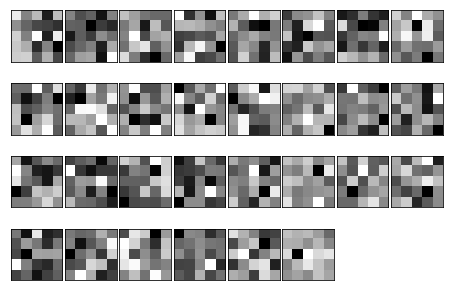

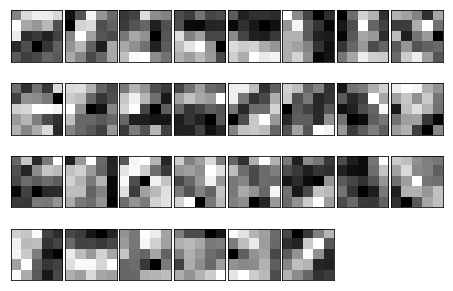

In [73]:
def filter_show(filters, nx=8, margin=3, scale=10):
    """
    c.f. https://gist.github.com/aidiary/07d530d5e08011832b12#file-draw_weight-py
    """
    FN, C, FH, FW = filters.shape
    ny = int(np.ceil(FN / nx))

    fig = plt.figure()
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

    for i in range(FN):
        ax = fig.add_subplot(ny, nx, i+1, xticks=[], yticks=[])
        ax.imshow(filters[i, 0], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()


network = SimpleConvNet()
# ランダム初期化後の重み
filter_show(network.params['W1'])

# 学習後の重み
network.load_params("params.pkl")
filter_show(network.params['W1'])

以上でスクラッチは終わりになります.  
NN,CNN共にかなり深く理解する事ができました。